## Implémentation de l'algorithme apriori sur le Jeu de données wine

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df  = pd.read_csv("../wine/wine.data", sep=",", header=None,  names=["class", "Alcohol","Malic acid","Ash","Alcanity of Ash","Magnesium","Total phenol","Flavanoids","NonFlavanoids phenols","preonthocyanins","color intensity","Hue","OD280/OD315 of diluted wines","proline"])
df.head()

,class,Alcohol,Malic acid,Ash,Alcanity of Ash,Magnesium,Total phenol,Flavanoids,NonFlavanoids phenols,preonthocyanins,color intensity,Hue,OD280/OD315 of diluted wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcanity of Ash               178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenol                  178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   NonFlavanoids phenols         178 non-null    float64
 9   preonthocyanins               178 non-null    float64
 10  color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  proli

In [4]:
print("Donc aucune valeur manquante..")

Donc aucune valeur manquante..


In [5]:
print("caractéristiques..")
df.describe()

caractéristiques..


,class,Alcohol,Malic acid,Ash,Alcanity of Ash,Magnesium,Total phenol,Flavanoids,NonFlavanoids phenols,preonthocyanins,color intensity,Hue,OD280/OD315 of diluted wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Discrétisation du dataset en quantile, d'autres en 5, 4 groupes..

In [6]:
df_discretize = pd.DataFrame()

df_discretize['Alcohol'] = pd.qcut(df['Alcohol'], q=3, labels=['Faible', 'Moyen', 'Élevé'])
df_discretize['Malic acid'] = pd.qcut(df['Malic acid'], q=3, labels=['Faible', 'Moyen', 'Élevé'])
#df_discretize['Ash'] = pd.qcut(df['Ash'], q=3, labels=['Faible', 'Moyen', 'Élevé'])
#df_discretize['Alcanity of Ash'] = pd.qcut(df['Alcanity of Ash'], q=3, labels=['Faible', 'Moyen', 'Élevé'])
df_discretize['Magnesium'] = pd.cut(df['Magnesium'], bins=2 , labels=['Petit', 'Grand'])

In [7]:
df_discretize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Alcohol     178 non-null    category
 1   Malic acid  178 non-null    category
 2   Magnesium   178 non-null    category
dtypes: category(3)
memory usage: 1.0 KB


In [8]:
df_discretize.head()

,Alcohol,Malic acid,Magnesium
0,Élevé,Moyen,Grand
1,Moyen,Moyen,Petit
2,Moyen,Moyen,Petit
3,Élevé,Moyen,Petit
4,Moyen,Élevé,Grand


In [9]:
df_discretize.describe()

,Alcohol,Malic acid,Magnesium
count,178,178,178
unique,3,3,2
top,Faible,Faible,Petit
freq,60,60,157


#### On remarque  bien que les 5 colonnes choisies n'apparaissent plus

In [10]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [11]:
# 2. Préparation des données pour l'algorithme Aprior

In [12]:
def prepare_transactions(df):
    transactions = []
    
    for _, row in df.iterrows():
        transaction = []
        for col in df.columns:
            # Créer des items de la forme "Variable=Valeur"
            item = f"{col}={row[col]}"
            transaction.append(item)
        transactions.append(transaction)
    
    return transactions

# Création des transactions
transactions = prepare_transactions(df_discretize)

In [13]:
print(f"\nNombre total de transactions: {len(transactions)}")
print("\nExemple de transaction:")
print(transactions[0])


Nombre total de transactions: 178

Exemple de transaction:
['Alcohol=Élevé', 'Malic acid=Moyen', 'Magnesium=Grand']


In [14]:
# 3. Encodage des transactions pour Apriori
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

print(f"\nShape des données encodées: {df_encoded.shape}")
print("\nColonnes (items) disponibles:")
print(df_encoded.columns.tolist())


Shape des données encodées: (178, 8)

Colonnes (items) disponibles:
['Alcohol=Faible', 'Alcohol=Moyen', 'Alcohol=Élevé', 'Magnesium=Grand', 'Magnesium=Petit', 'Malic acid=Faible', 'Malic acid=Moyen', 'Malic acid=Élevé']


In [15]:
# Calcul des itemsets fréquents
frequent_itemsets = apriori(df_encoded, 
                           min_support=0.28,  #Le support minimale ici est 32% pour avoir plus d'information
                           use_colnames=True,
                           max_len=None)

print(f"\nNombre d'itemsets fréquents trouvés: {len(frequent_itemsets)}")
print("\nItemsets fréquents")
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
print(frequent_itemsets.sort_values('support', ascending=False).head(10))



Nombre d'itemsets fréquents trouvés: 12

Itemsets fréquents
     support                             itemsets  length
3   0.882022                    (Magnesium=Petit)       1
0   0.337079                     (Alcohol=Faible)       1
6   0.337079                   (Malic acid=Élevé)       1
4   0.337079                  (Malic acid=Faible)       1
2   0.331461                      (Alcohol=Élevé)       1
1   0.331461                      (Alcohol=Moyen)       1
5   0.325843                   (Malic acid=Moyen)       1
7   0.308989    (Alcohol=Faible, Magnesium=Petit)       2
11  0.308989  (Malic acid=Élevé, Magnesium=Petit)       2
8   0.297753     (Alcohol=Moyen, Magnesium=Petit)       2


In [16]:
# 5. Extraction des règles d'association
print("\nExtraction des règles d'association...")

rules = association_rules(frequent_itemsets, 
                         metric="confidence", 
                         min_threshold=0.5)

print(f"\nNombre de règles trouvées: {len(rules)}")

if len(rules) > 0:
    # Tri par confidence décroissante
    rules = rules.sort_values('confidence', ascending=False)
    
    print("\nRègles d'association (top 15):")
    display_columns = ['antecedents', 'consequents', 'support', 'confidence', 'lift']
    print(rules[display_columns].head(15))
    
    # 6. Analyse des règles
    print("\n=== ANALYSE DES RÈGLES ===")
    
    # Règles avec le plus fort lift
    print("\nRègles avec le plus fort lift (corrélation):")
    high_lift_rules = rules[rules['lift'] > 1].sort_values('lift', ascending=False)
    print(high_lift_rules[display_columns].head(10))


Extraction des règles d'association...

Nombre de règles trouvées: 5

Règles d'association (top 15):
           antecedents        consequents   support  confidence      lift
0     (Alcohol=Faible)  (Magnesium=Petit)  0.308989    0.916667  1.039278
4   (Malic acid=Élevé)  (Magnesium=Petit)  0.308989    0.916667  1.039278
1      (Alcohol=Moyen)  (Magnesium=Petit)  0.297753    0.898305  1.018461
2  (Malic acid=Faible)  (Magnesium=Petit)  0.292135    0.866667  0.982590
3   (Malic acid=Moyen)  (Magnesium=Petit)  0.280899    0.862069  0.977378

=== ANALYSE DES RÈGLES ===

Règles avec le plus fort lift (corrélation):
          antecedents        consequents   support  confidence      lift
0    (Alcohol=Faible)  (Magnesium=Petit)  0.308989    0.916667  1.039278
4  (Malic acid=Élevé)  (Magnesium=Petit)  0.308989    0.916667  1.039278
1     (Alcohol=Moyen)  (Magnesium=Petit)  0.297753    0.898305  1.018461


In [17]:
# Règles avec forte confidence
print("\nRègles avec forte confidence (> 0.8):")
high_conf_rules = rules[rules['confidence'] > 0.8]
if len(high_conf_rules) > 0:
    print(high_conf_rules[display_columns])
else:
    print("Aucune règle avec confidence > 0.8")


Règles avec forte confidence (> 0.8):
           antecedents        consequents   support  confidence      lift
0     (Alcohol=Faible)  (Magnesium=Petit)  0.308989    0.916667  1.039278
4   (Malic acid=Élevé)  (Magnesium=Petit)  0.308989    0.916667  1.039278
1      (Alcohol=Moyen)  (Magnesium=Petit)  0.297753    0.898305  1.018461
2  (Malic acid=Faible)  (Magnesium=Petit)  0.292135    0.866667  0.982590
3   (Malic acid=Moyen)  (Magnesium=Petit)  0.280899    0.862069  0.977378


### Visualisation

In [18]:
# 7. Visualisations
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, 'Support vs Confidence')

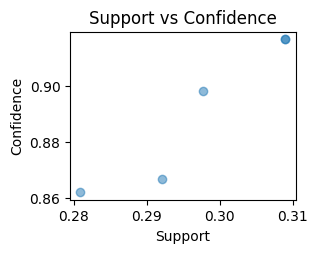

In [19]:
# Graphique 1: Support vs Confidence
plt.subplot(2, 2, 1)
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')

Text(0.5, 1.0, 'Top 10 règles par Lift')

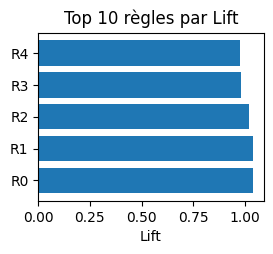

In [20]:
# Graphique 2: Top 10 règles par lift
plt.subplot(2, 2, 2)
top_rules = rules.head(10)
rules_labels = [f"R{i}" for i in range(len(top_rules))]
plt.barh(rules_labels, top_rules['lift'])
plt.xlabel('Lift')
plt.title('Top 10 règles par Lift')

Text(0.5, 1.0, 'Distribution du Support des Itemsets')

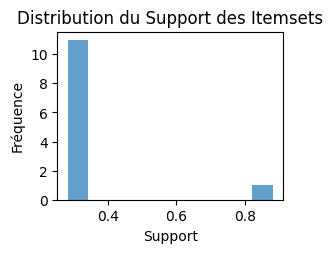

In [21]:
plt.subplot(2, 2, 3)
plt.hist(frequent_itemsets['support'], bins=10, alpha=0.7)
plt.xlabel('Support')
plt.ylabel('Fréquence')
plt.title('Distribution du Support des Itemsets')

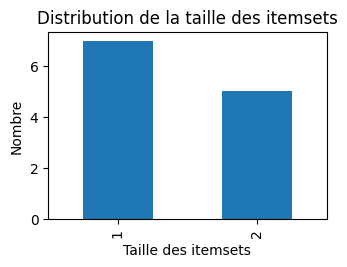

In [22]:
 # Graphique 4: Taille des itemsets fréquents
plt.subplot(2, 2, 4)
itemset_sizes = frequent_itemsets['length'].value_counts().sort_index()
itemset_sizes.plot(kind='bar')
plt.xlabel('Taille des itemsets')
plt.ylabel('Nombre')
plt.title('Distribution de la taille des itemsets')

plt.tight_layout()
plt.show()

In [23]:
# 8. Interprétation des meilleures règles
print("\n=== INTERPRÉTATION DES MEILLEURES RÈGLES ===")
top_5_rules = rules.head(5)

for i, (idx, rule) in enumerate(top_5_rules.iterrows()):
    print(f"\nRègle #{i+1}:")
    print(f"SI {set(rule['antecedents'])} ALORS {set(rule['consequents'])}")
    print(f"Support: {rule['support']:.3f}")
    print(f"Confidence: {rule['confidence']:.3f}")
    print(f"Lift: {rule['lift']:.3f}")
        



=== INTERPRÉTATION DES MEILLEURES RÈGLES ===

Règle #1:
SI {'Alcohol=Faible'} ALORS {'Magnesium=Petit'}
Support: 0.309
Confidence: 0.917
Lift: 1.039

Règle #2:
SI {'Malic acid=Élevé'} ALORS {'Magnesium=Petit'}
Support: 0.309
Confidence: 0.917
Lift: 1.039

Règle #3:
SI {'Alcohol=Moyen'} ALORS {'Magnesium=Petit'}
Support: 0.298
Confidence: 0.898
Lift: 1.018

Règle #4:
SI {'Malic acid=Faible'} ALORS {'Magnesium=Petit'}
Support: 0.292
Confidence: 0.867
Lift: 0.983

Règle #5:
SI {'Malic acid=Moyen'} ALORS {'Magnesium=Petit'}
Support: 0.281
Confidence: 0.862
Lift: 0.977


### Exportation des résultats

In [24]:
# Sauvegarde des règles
rules.to_csv('regles_association_vin.csv', index=False)
frequent_itemsets.to_csv('itemsets_frequents_vin.csv', index=False)

print("Résultats exportés dans 'regles_association_vin.csv' et 'itemsets_frequents_vin.csv'")


Résultats exportés dans 'regles_association_vin.csv' et 'itemsets_frequents_vin.csv'
